# EDA

这个notebook主要对电商广告的数据集进行了一些探索和挖掘。

比赛：[天池阿里妈妈](https://tianchi.aliyun.com/competition/introduction.htm?spm=5176.100068.5678.1.15cf4055o7W8pX&raceId=231647)搜索广告转化预测

[数据集介绍](https://tianchi.aliyun.com/competition/information.htm?spm=5176.100067.5678.2.5f7b4558ciIy0i&raceId=231647)

In [5]:
import numpy as np
import pandas as pd
import datetime
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

%matplotlib inline

train = pd.read_csv("./train.txt", sep="\s+")

In [4]:
train.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [15]:
train.context_timestamp.head()

0    1537236544
1    1537243232
2    1537211052
3    1537222670
4    1537271320
Name: context_timestamp, dtype: int64

In [29]:
train.user_occupation_id.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: user_occupation_id, dtype: int64

In [31]:
print("Train Rows : ", train.shape[0])

Train Rows :  478138


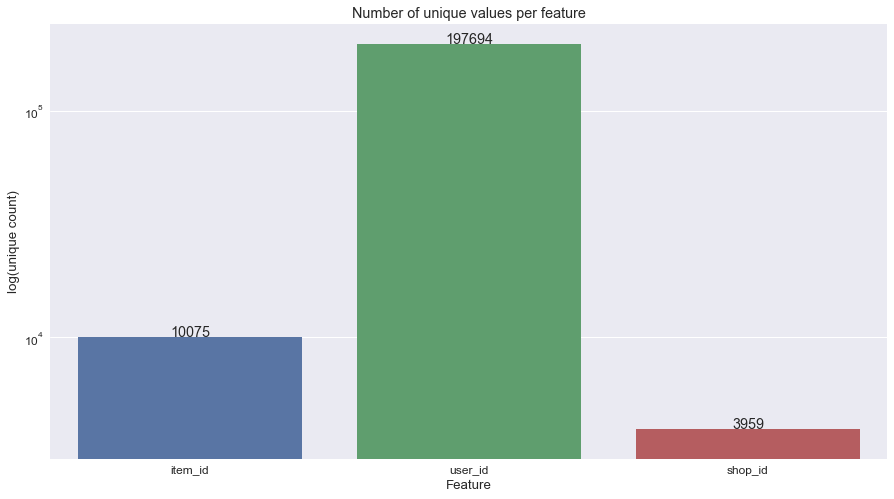

In [9]:
plt.figure(figsize=(15, 8))
cols = ['item_id', 'user_id', 'shop_id']
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [27]:
plt.figure(figsize=(15, 8))
cols = ['item_id', 'user_id', 'shop_id', 'is_trade']
for col in cols:
    print(train[col].value_counts())

7571023501622243456    3001
2986722878397696833    2836
5410526681843914464    2578
2079092401639430105    2515
2709839111509701702    2448
5716046650492250518    2267
5467735841796001072    2258
2723541945574109807    2021
3444647220397515150    1937
4817583173619024436    1919
4162406225225963765    1780
7937690818610877888    1683
8970449145125394567    1631
534920639711707822     1608
751443051994527892     1596
671302156973073367     1591
5634978682268415449    1571
5586531724608162781    1528
2349124492995958413    1403
2530039332833674681    1397
509936336103770855     1396
5088920748697829728    1377
4885486757349832183    1368
3401173841796395052    1339
4429962171977692955    1321
7697581527441910922    1260
8906948455106358440    1249
8961114074287787809    1245
6335890202072992021    1219
7085665113142227362    1197
                       ... 
1775063958422298615       1
8741313323712857343       1
7850388393362241987       1
6877213681214216498       1
8240374249616619976 

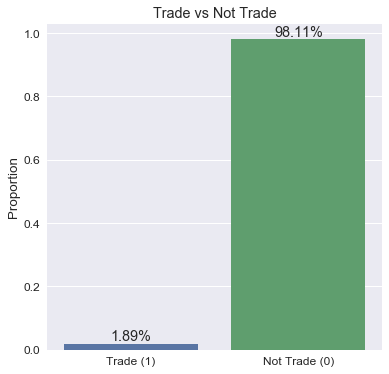

In [30]:
plt.figure(figsize=(6,6))
#sns.set(font_scale=1.2)
mean = (train.is_trade.values == 1).mean()
ax = sns.barplot(['Trade (1)', 'Not Trade (0)'], [mean, 1-mean])
ax.set(ylabel='Proportion', title='Trade vs Not Trade')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

### Quick Observe

1、训练集总共478138个样本，但是交易成功的样本只占其中的1.89%

2、很多样本都是同一个商品

3、数据都经过脱敏处理

## 店铺信息

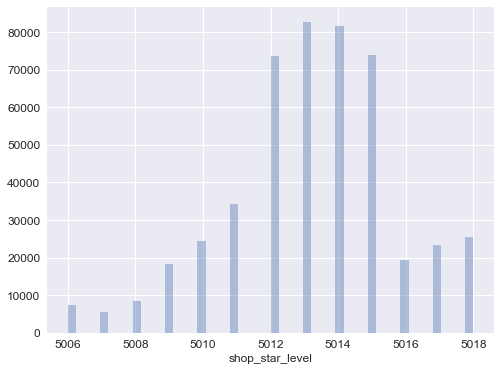

In [34]:
llimit = np.percentile(train.shop_star_level.values, 1)
ulimit = np.percentile(train.shop_star_level.values, 99)
train['shop_star_level'].ix[train['shop_star_level']<llimit] = llimit
train['shop_star_level'].ix[train['shop_star_level']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train.shop_star_level.values, bins=50, kde=False)
plt.xlabel('shop_star_level', fontsize=12)
plt.show()

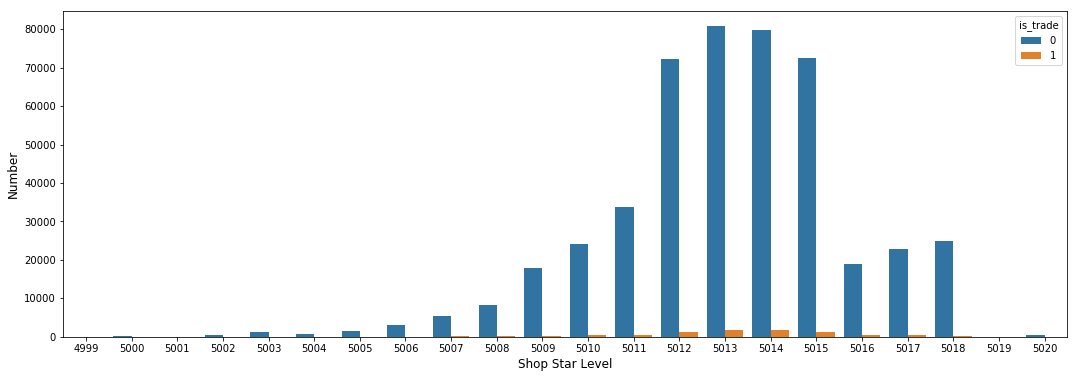

In [25]:
plt.figure(figsize=(18,6))
sns.countplot(x='shop_star_level', hue='is_trade', data=train)
plt.ylabel('Number', fontsize=12)
plt.xlabel('Shop Star Level', fontsize=12)
plt.show()

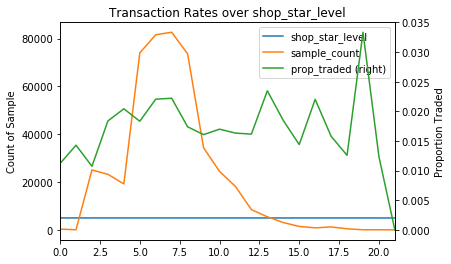

Transaction Rates over Shop Star level
    shop_star_level  sample_count  prop_traded
0              5020           357     0.011204
1              5019            70     0.014286
2              5018         25075     0.010728
3              5017         23243     0.018371
4              5016         19239     0.020427
5              5015         73992     0.018326
6              5014         81596     0.022048
7              5013         82641     0.022204
8              5012         73611     0.017389
9              5011         34356     0.016067
10             5010         24487     0.016989
11             5009         18191     0.016327
12             5008          8480     0.016156
13             5007          5500     0.023455
14             5006          3087     0.018465
15             5005          1459     0.014393
16             5004           863     0.022016
17             5003          1266     0.015798
18             5002           477     0.012579
19             5001  

In [20]:
proportion = train[['shop_star_level', 'is_trade']].groupby('shop_star_level', as_index=False).mean().sort_values('shop_star_level', ascending=False)
counts = train[['shop_star_level', 'is_trade']].groupby('shop_star_level', as_index=False).count().sort_values('shop_star_level', ascending=False)
merge = counts.merge(proportion, on='shop_star_level', how='left')
merge.columns = ['shop_star_level', 'sample_count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over shop_star_level')
ax.set(ylabel='Count of Sample')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over Shop Star level')
print(merge)

店铺星级编号

C:\Software\Anaconda3\envs\dlnd\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


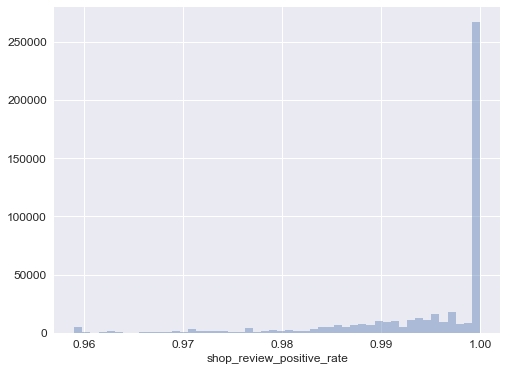

In [48]:
llimit = np.percentile(train.shop_review_positive_rate.values, 1)
ulimit = np.percentile(train.shop_review_positive_rate.values, 99)
train['shop_review_positive_rate'].loc[train['shop_review_positive_rate']<llimit] = llimit
train['shop_review_positive_rate'].loc[train['shop_review_positive_rate']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train.shop_review_positive_rate.values, bins=50, kde=False)
plt.xlabel('shop_review_positive_rate', fontsize=12)
plt.show()

大部分店铺评价数据都是好评

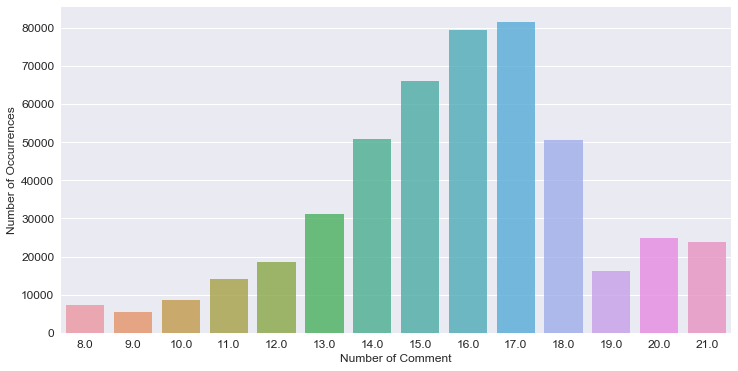

In [51]:
train["shop_review_num_level"] = train["shop_review_num_level"]
cnt_srs = train['shop_review_num_level'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Comment', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

店铺评价数量

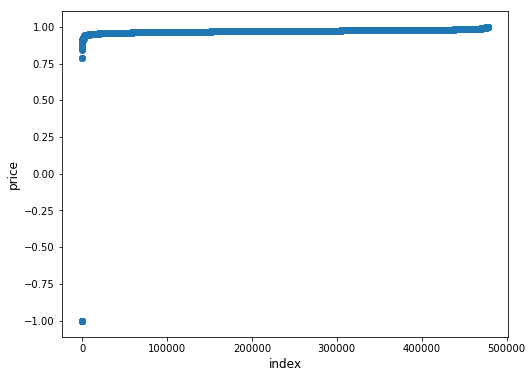

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.shop_score_service.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('score', fontsize=12)
plt.show()

店铺的服务态度评分分布图

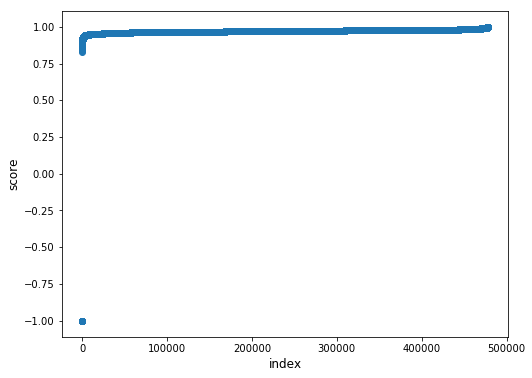

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.shop_score_delivery.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('score', fontsize=12)
plt.show()

店铺的物流服务评分分布图

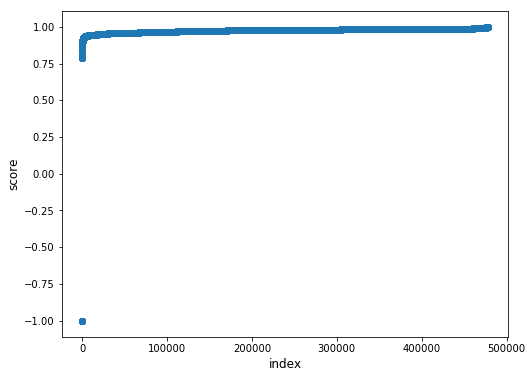

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.shop_score_description.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('score', fontsize=12)
plt.show()

店铺的描述相符评分分布图

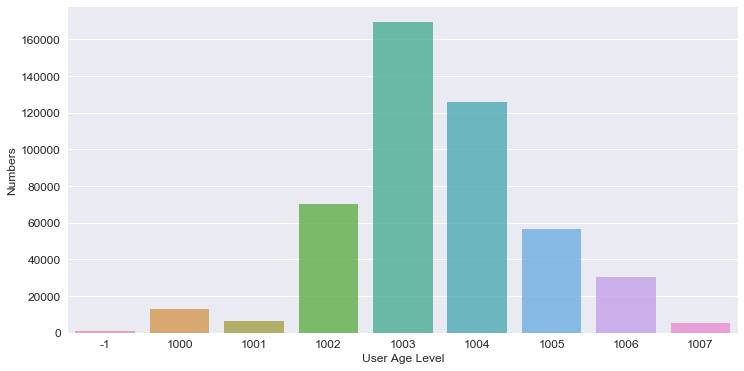

In [53]:
train["user_age_level"] = train["user_age_level"]
cnt_srs = train['user_age_level'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('User Age Level', fontsize=12)
plt.ylabel('Numbers', fontsize=12)
plt.show()

## 用户信息

用户年龄

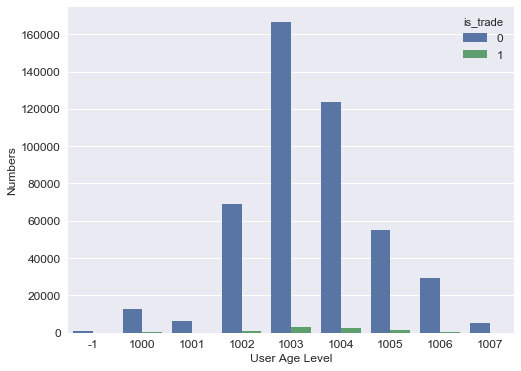

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(x='user_age_level', hue='is_trade', data=train)
plt.ylabel('Numbers', fontsize=12)
plt.xlabel('User Age Level', fontsize=12)
plt.show()

用户年龄和交易关系

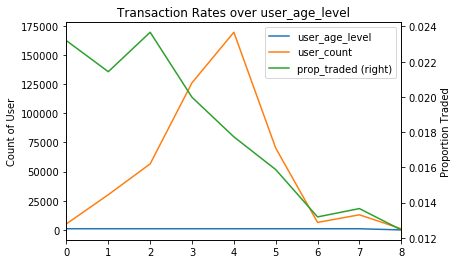

Transaction Rates over User Age Level
   user_age_level  user_count  prop_traded
0            1007        5217     0.023193
1            1006       30190     0.021431
2            1005       56608     0.023672
3            1004      126131     0.019979
4            1003      169449     0.017734
5            1002       70175     0.015875
6            1001        6446     0.013186
7            1000       12958     0.013660
8              -1         964     0.012448


In [10]:
proportion = train[['user_age_level', 'is_trade']].groupby('user_age_level', as_index=False).mean().sort_values('user_age_level', ascending=False)
counts = train[['user_age_level', 'is_trade']].groupby('user_age_level', as_index=False).count().sort_values('user_age_level', ascending=False)
merge = counts.merge(proportion, on='user_age_level', how='left')
merge.columns = ['user_age_level', 'user_count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over user_age_level')
ax.set(ylabel='Count of User')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over User Age Level')
print(merge)

用户年龄大的反而交易率高

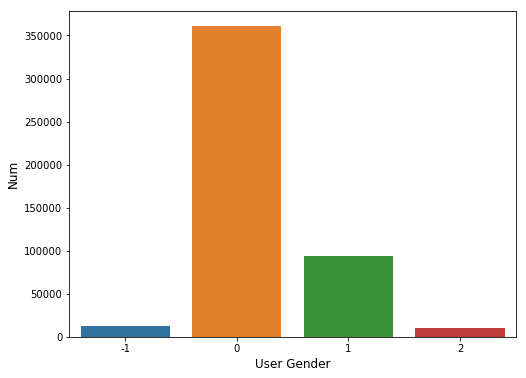

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='user_gender_id', data=train)
plt.ylabel('Num', fontsize=12)
plt.xlabel('User Gender', fontsize=12)
plt.show()

女性用户居多

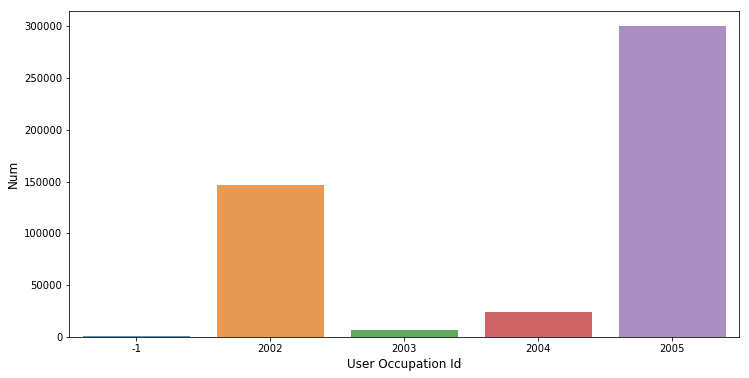

In [30]:
cnt_srs = train['user_occupation_id'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('User Occupation Id', fontsize=12)
plt.ylabel('Num', fontsize=12)
plt.show()

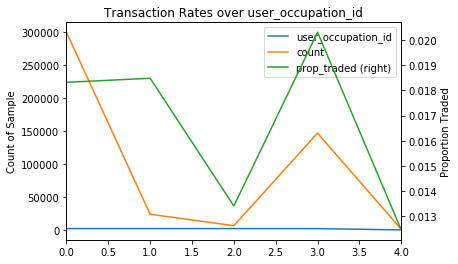

Transaction Rates over User Occupation Id
   user_occupation_id   count  prop_traded
0                2005  300036     0.018324
1                2004   23803     0.018485
2                2003    6418     0.013400
3                2002  146917     0.020318
4                  -1     964     0.012448


In [31]:
proportion = train[['user_occupation_id', 'is_trade']].groupby('user_occupation_id', as_index=False).mean().sort_values('user_occupation_id', ascending=False)
counts = train[['user_occupation_id', 'is_trade']].groupby('user_occupation_id', as_index=False).count().sort_values('user_occupation_id', ascending=False)
merge = counts.merge(proportion, on='user_occupation_id', how='left')
merge.columns = ['user_occupation_id', 'count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over user_occupation_id')
ax.set(ylabel='Count of Sample')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over User Occupation Id')
print(merge)

用户职业信息

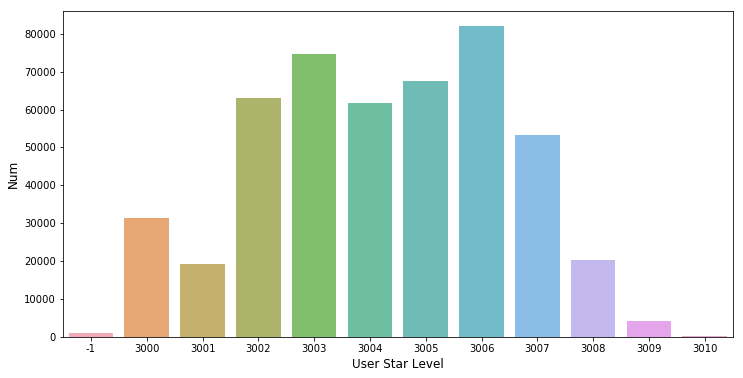

In [33]:
cnt_srs = train['user_star_level'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('User Star Level', fontsize=12)
plt.ylabel('Num', fontsize=12)
plt.show()

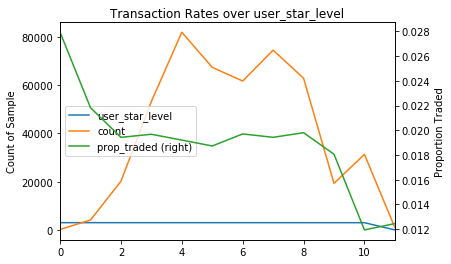

Transaction Rates over User Star Level
    user_star_level  count  prop_traded
0              3010    179     0.027933
1              3009   4124     0.021823
2              3008  20178     0.019427
3              3007  53315     0.019676
4              3006  82009     0.019205
5              3005  67440     0.018728
6              3004  61769     0.019702
7              3003  74578     0.019429
8              3002  62921     0.019803
9              3001  19325     0.018060
10             3000  31336     0.011935
11               -1    964     0.012448


In [35]:
proportion = train[['user_star_level', 'is_trade']].groupby('user_star_level', as_index=False).mean().sort_values('user_star_level', ascending=False)
counts = train[['user_star_level', 'is_trade']].groupby('user_star_level', as_index=False).count().sort_values('user_star_level', ascending=False)
merge = counts.merge(proportion, on='user_star_level', how='left')
merge.columns = ['user_star_level', 'count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over user_star_level')
ax.set(ylabel='Count of Sample')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over User Star Level')
print(merge)

用户星级越高交易率越高

## 商品信息

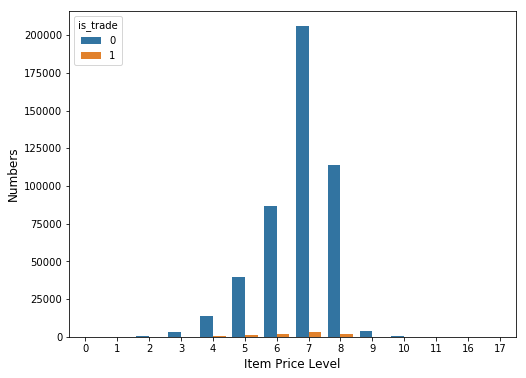

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='item_price_level', hue='is_trade', data=train)
plt.ylabel('Numbers', fontsize=12)
plt.xlabel('Item Price Level', fontsize=12)
plt.show()

商品价格信息

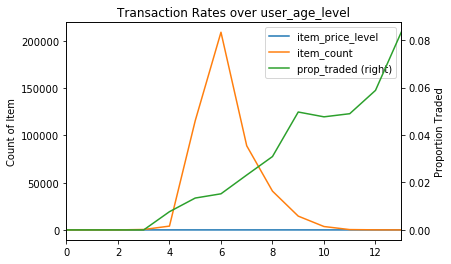

Tradion Rates over Counts of Most Popular IPs
    item_price_level  item_count  prop_traded
0                 17           1     0.000000
1                 16           1     0.000000
2                 11          21     0.000000
3                 10         456     0.000000
4                  9        4035     0.007683
5                  8      115587     0.013436
6                  7      209285     0.015223
7                  6       89057     0.023142
8                  5       41057     0.030933
9                  4       14607     0.049702
10                 3        3587     0.047672
11                 2         347     0.048991
12                 1          85     0.058824
13                 0          12     0.083333


In [9]:
proportion = train[['item_price_level', 'is_trade']].groupby('item_price_level', as_index=False).mean().sort_values('item_price_level', ascending=False)
counts = train[['item_price_level', 'is_trade']].groupby('item_price_level', as_index=False).count().sort_values('item_price_level', ascending=False)
merge = counts.merge(proportion, on='item_price_level', how='left')
merge.columns = ['item_price_level', 'item_count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over item_price_level')
ax.set(ylabel='Count of Item')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over Item Price level')
print(merge)

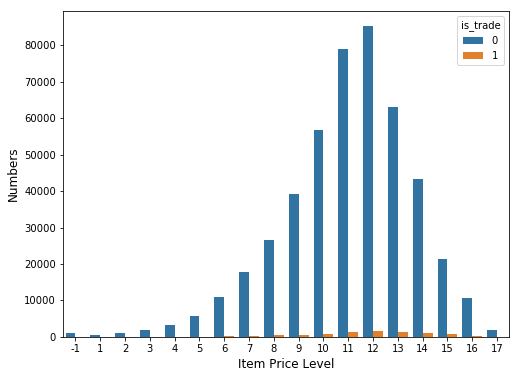

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='item_sales_level', hue='is_trade', data=train)
plt.ylabel('Numbers', fontsize=12)
plt.xlabel('Item Price Level', fontsize=12)
plt.show()

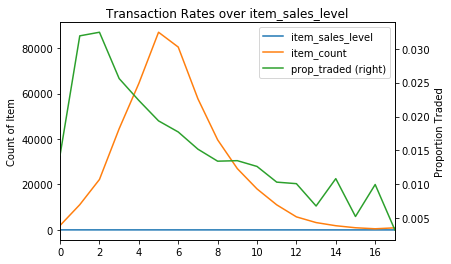

Transaction Rates over Counts of Most Popular IPs
    item_sales_level  item_count  prop_traded
0                 17        1955     0.014322
1                 16       11096     0.031903
2                 15       22199     0.032434
3                 14       44525     0.025604
4                 13       64451     0.022374
5                 12       86960     0.019365
6                 11       80440     0.017727
7                 10       57664     0.015191
8                  9       39638     0.013421
9                  8       26969     0.013497
10                 7       18030     0.012646
11                 6       11034     0.010332
12                 5        5739     0.010106
13                 4        3230     0.006811
14                 3        1844     0.010846
15                 2         950     0.005263
16                 1         501     0.009980
17                -1         913     0.003286


In [12]:
proportion = train[['item_sales_level', 'is_trade']].groupby('item_sales_level', as_index=False).mean().sort_values('item_sales_level', ascending=False)
counts = train[['item_sales_level', 'is_trade']].groupby('item_sales_level', as_index=False).count().sort_values('item_sales_level', ascending=False)
merge = counts.merge(proportion, on='item_sales_level', how='left')
merge.columns = ['item_sales_level', 'item_count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over item_sales_level')
ax.set(ylabel='Count of Item')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over Item sales level')
print(merge)

商品销量越高，交易率越高

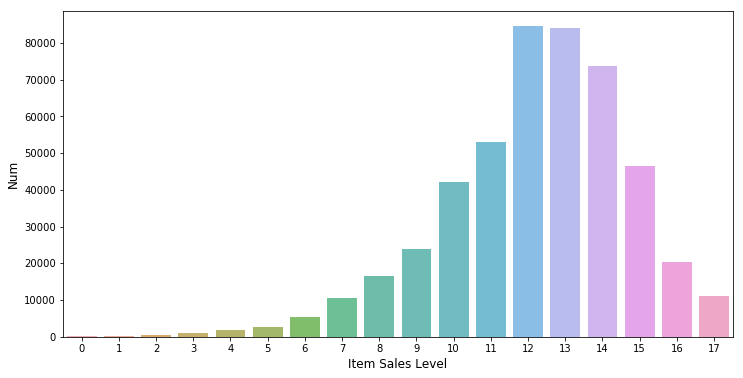

In [37]:
cnt_srs = train['item_collected_level'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Item Sales Level', fontsize=12)
plt.ylabel('Num', fontsize=12)
plt.show()

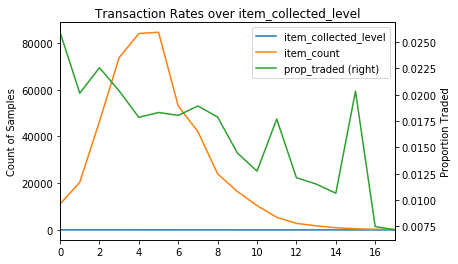

Transaction Rates over Item Collected level
    item_collected_level  item_count  prop_traded
0                     17       11071     0.025924
1                     16       20403     0.020144
2                     15       46410     0.022560
3                     14       73771     0.020360
4                     13       84050     0.017847
5                     12       84601     0.018309
6                     11       53010     0.018034
7                     10       42053     0.018928
8                      9       23999     0.017876
9                      8       16443     0.014474
10                     7       10438     0.012742
11                     6        5372     0.017684
12                     5        2804     0.012126
13                     4        1736     0.011521
14                     3         939     0.010650
15                     2         492     0.020325
16                     1         267     0.007491
17                     0         279     0.007168


In [38]:
proportion = train[['item_collected_level', 'is_trade']].groupby('item_collected_level', as_index=False).mean().sort_values('item_collected_level', ascending=False)
counts = train[['item_collected_level', 'is_trade']].groupby('item_collected_level', as_index=False).count().sort_values('item_collected_level', ascending=False)
merge = counts.merge(proportion, on='item_collected_level', how='left')
merge.columns = ['item_collected_level', 'count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over item_collected_level')
ax.set(ylabel='Count of Samples')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over Item Collected level')
print(merge)

商品被收藏次数越高，交易率越高

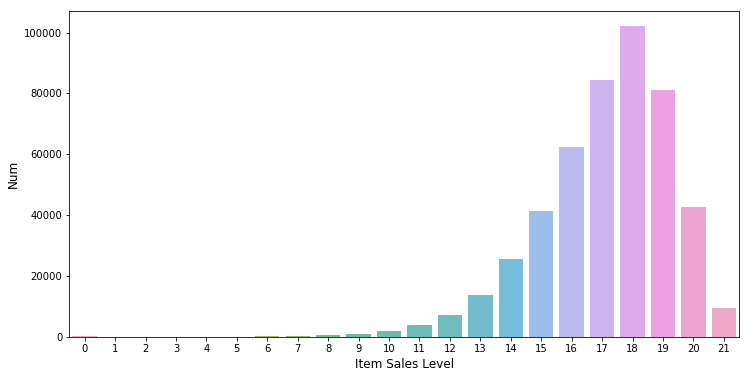

In [39]:
cnt_srs = train['item_pv_level'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Item Sales Level', fontsize=12)
plt.ylabel('Num', fontsize=12)
plt.show()

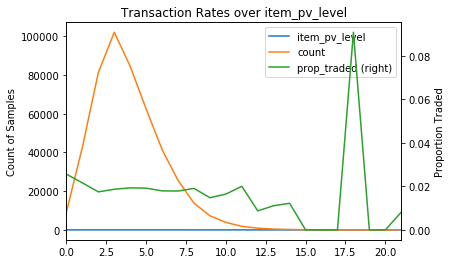

Transaction Rates over Item Pv level
    item_pv_level   count  prop_traded
0              21    9321     0.025641
1              20   42761     0.021632
2              19   81253     0.017501
3              18  102083     0.018700
4              17   84444     0.019350
5              16   62440     0.019202
6              15   41479     0.017961
7              14   25548     0.017888
8              13   13828     0.019092
9              12    7292     0.014811
10             11    3885     0.016474
11             10    1845     0.020054
12              9     913     0.008762
13              8     449     0.011136
14              7     245     0.012245
15              6     116     0.000000
16              5      63     0.000000
17              4      33     0.000000
18              3      11     0.090909
19              2       5     0.000000
20              1       1     0.000000
21              0     123     0.008130


In [40]:
proportion = train[['item_pv_level', 'is_trade']].groupby('item_pv_level', as_index=False).mean().sort_values('item_pv_level', ascending=False)
counts = train[['item_pv_level', 'is_trade']].groupby('item_pv_level', as_index=False).count().sort_values('item_pv_level', ascending=False)
merge = counts.merge(proportion, on='item_pv_level', how='left')
merge.columns = ['item_pv_level', 'count', 'prop_traded']

ax = merge.plot(secondary_y='prop_traded')
plt.title('Transaction Rates over item_pv_level')
ax.set(ylabel='Count of Samples')
plt.ylabel('Proportion Traded')
plt.show()

print('Transaction Rates over Item Pv level')
print(merge)

商品被展示次数等级越高，交易率越高